In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv('/content/Unemployment in America Per US State.csv')
df.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  object 
 5   Total Civilian Labor Force in State/Area                   29892 non-null  object 
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  object 
 8   Percen

**THERE ARE NO NULL VALUES**

In [ ]:
(df.isnull().sum()/len(df))*100

FIPS Code                                                    0.0
State/Area                                                   0.0
Year                                                         0.0
Month                                                        0.0
Total Civilian Non-Institutional Population in State/Area    0.0
Total Civilian Labor Force in State/Area                     0.0
Percent (%) of State/Area's Population                       0.0
Total Employment in State/Area                               0.0
Percent (%) of Labor Force Employed in State/Area            0.0
Total Unemployment in State/Area                             0.0
Percent (%) of Labor Force Unemployed in State/Area          0.0
dtype: float64

In [ ]:
df.describe(include='all')

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
count,29892.000000,29892,29892.000000,29892.00000,29892,29892,29892.000000,29892,29892.000000,29892,29892.000000
unique,NaN,53,NaN,NaN,25836,29755,NaN,29743,NaN,28261,NaN
top,NaN,Alabama,NaN,NaN,"483,000","604,728",NaN,"337,853",NaN,"50,730",NaN
freq,NaN,564,NaN,NaN,39,2,NaN,4,NaN,4,NaN
mean,990.830189,NaN,1999.000000,6.50000,NaN,NaN,65.516202,NaN,61.670417,NaN,5.920788
std,6935.157218,NaN,13.564887,3.45211,NaN,NaN,4.304355,NaN,4.739074,NaN,2.207521
min,1.000000,NaN,1976.000000,1.00000,NaN,NaN,51.000000,NaN,41.600000,NaN,1.900000
25%,17.000000,NaN,1987.000000,3.75000,NaN,NaN,62.800000,NaN,58.600000,NaN,4.300000
50%,30.000000,NaN,1999.000000,6.50000,NaN,NaN,65.900000,NaN,61.800000,NaN,5.500000
75%,42.000000,NaN,2011.000000,9.25000,NaN,NaN,68.500000,NaN,65.100000,NaN,7.100000


In [ ]:
df.isnull().sum()

FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64

In [ ]:
output = []
for col in df.columns:
    unique = df[col].nunique()
    colType = str(df[col].dtype)
    categories=df[col].unique()

    output.append([col, unique, colType,categories])

output = pd.DataFrame(output)
output.columns = ['colName','unique','dtype','categories']
output

,colName,unique,dtype,categories
0,FIPS Code,52,int64,"[1, 2, 4, 5, 6, 37, 8, 9, 10, 11, 12, 13, 15, ..."
1,State/Area,53,object,"[Alabama, Alaska, Arizona, Arkansas, Californi..."
2,Year,47,int64,"[1976, 1977, 1978, 1979, 1980, 1981, 1982, 198..."
3,Month,12,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,Total Civilian Non-Institutional Population in...,25836,object,"[2,605,000 , 232,000 , 1,621,000 , 1,536..."
5,Total Civilian Labor Force in State/Area,29755,object,"[1,484,555 , 160,183 , 964,120 , 889,044..."
6,Percent (%) of State/Area's Population,248,float64,"[57.0, 69.0, 59.5, 57.9, 62.6, 64.1, 67.2, 64...."
7,Total Employment in State/Area,29743,object,"[1,386,023 , 148,820 , 865,871 , 824,395..."
8,Percent (%) of Labor Force Employed in State/Area,306,float64,"[53.2, 64.1, 53.4, 53.7, 56.8, 58.4, 63.3, 57...."
9,Total Unemployment in State/Area,28261,object,"[98,532 , 11,363 , 98,249 , 64,649 , 8..."


In [ ]:
nan_sum = df.isna().sum()

print("Sum of NaN values in each column:")
print(nan_sum)

Sum of NaN values in each column:
FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64


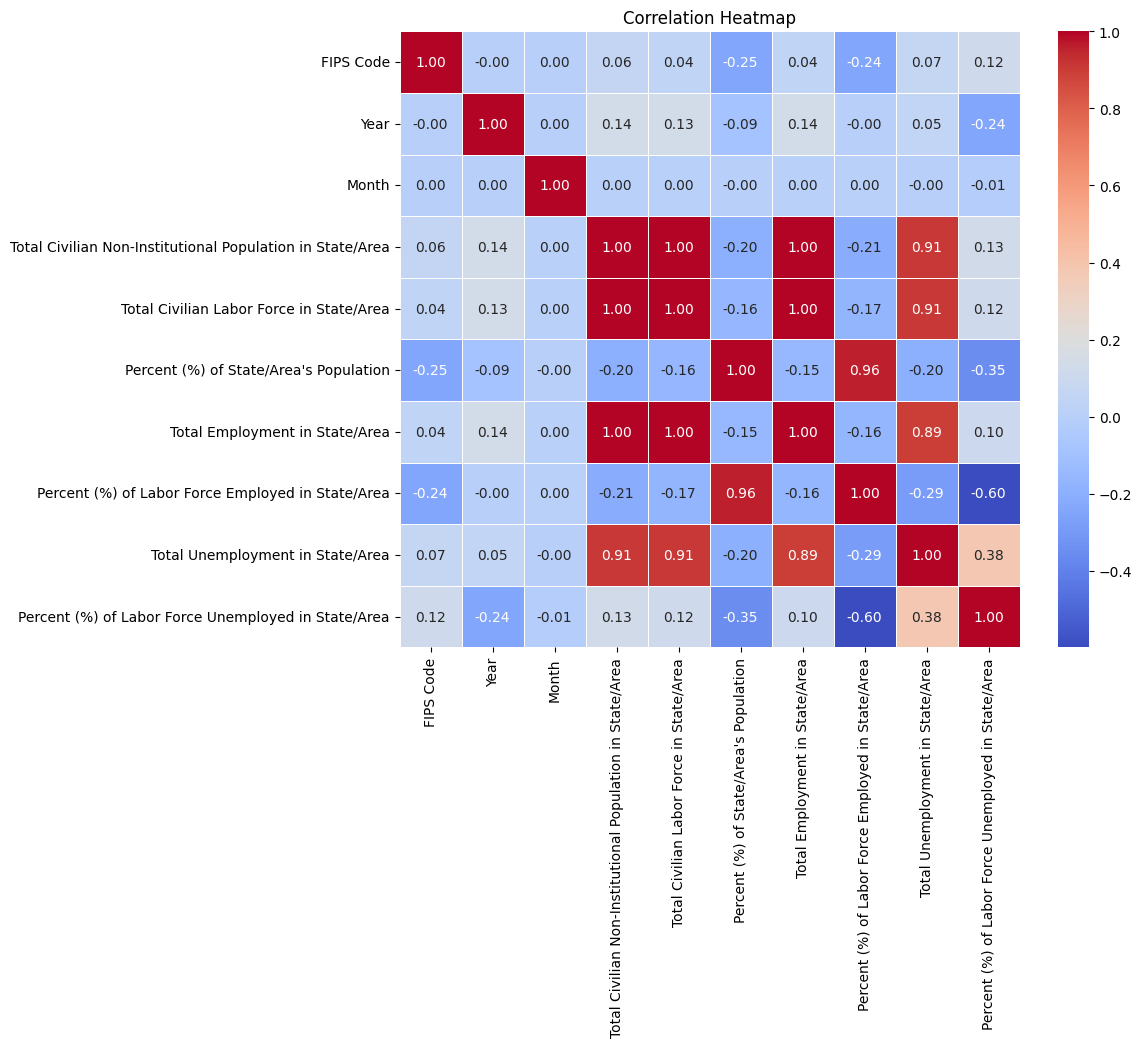

In [ ]:

numeric_cols = ['Total Civilian Non-Institutional Population in State/Area',
                'Total Civilian Labor Force in State/Area',
                'Total Employment in State/Area',
                'Total Unemployment in State/Area']
for col in numeric_cols:
    df[col] = df[col].str.replace(',', '').astype(float)

new_df = df.drop('State/Area', axis=1)

correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


We can see CORRELATION between **Total civilian labor Force and Total Civilian Non-Institutional Population**,**Total Employment in State and Total Civilian Labor Force**,**Percent of Labor Force Employment and Percent of State Population**

We are going to remove **TOTAL CIVILIAN LABOR FORCE** as it has CORRELATION with **Total Civilian Non-Institutional Population** and **Total Employment in State**

In [ ]:
df.drop(columns='Total Civilian Labor Force in State/Area',inplace=True)
df.head()

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,2605000.0,57.0,1386023.0,53.2,98532.0,6.6
1,2,Alaska,1976,1,232000.0,69.0,148820.0,64.1,11363.0,7.1
2,4,Arizona,1976,1,1621000.0,59.5,865871.0,53.4,98249.0,10.2
3,5,Arkansas,1976,1,1536000.0,57.9,824395.0,53.7,64649.0,7.3
4,6,California,1976,1,15621000.0,62.6,8875685.0,56.8,898595.0,9.2


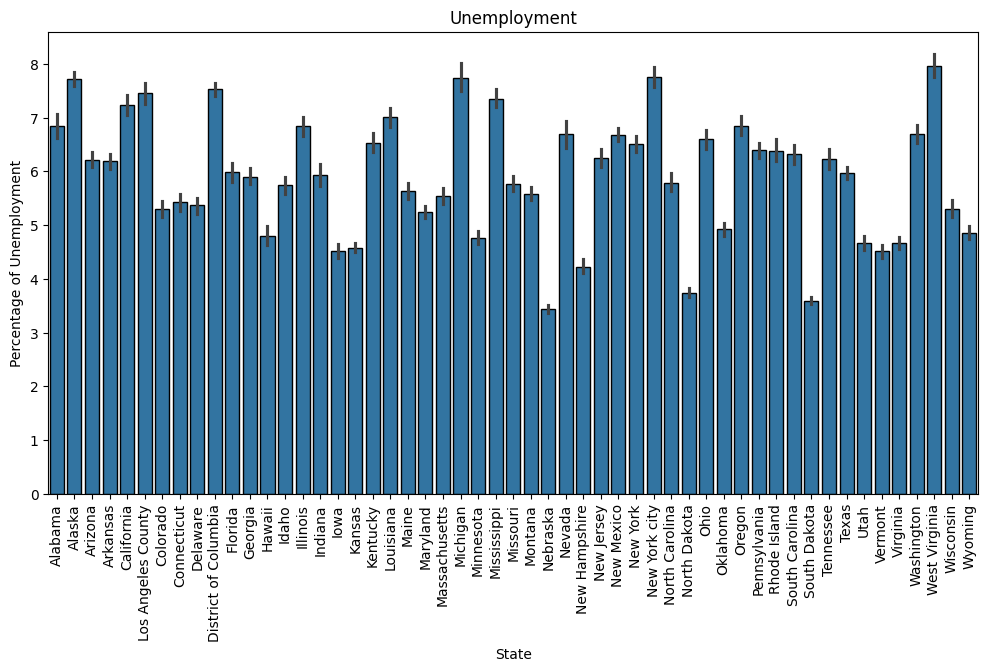

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State/Area', y='Percent (%) of Labor Force Unemployed in State/Area',data=df,edgecolor='black')
plt.title('Unemployment')
plt.xlabel('State')
plt.ylabel('Percentage of Unemployment')
plt.xticks(rotation=90)
plt.show()

As we can observe **WEST VIRGINIA** , **NEW YORK CITY** , **MICHIGAN** , **ALASKA** has highest unemployment.

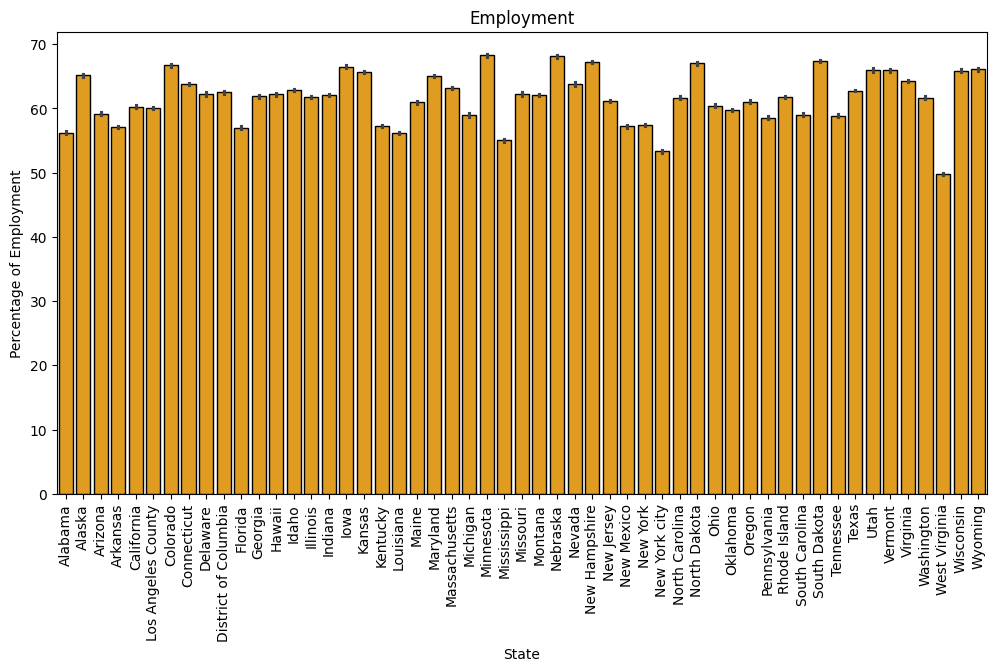

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State/Area', y='Percent (%) of Labor Force Employed in State/Area',data=df,edgecolor='black',color='orange')
plt.title('Employment')
plt.xlabel('State')
plt.ylabel('Percentage of Employment')
plt.xticks(rotation=90)
plt.show()

EMPLOYMENT RATE IS HIGHEST AT **MINNESOTA** , **NEBRASKA**, **NEW HAMPSHIRE** respectively.

##**DISTRIBUTION OF TOTAL POPULATION**

In [ ]:
new_df=pd.read_csv('/content/Unemployment in America Per US State.csv')

In [ ]:
numeric_cols = ['Total Civilian Non-Institutional Population in State/Area',
                'Total Civilian Labor Force in State/Area',
                'Total Employment in State/Area',
                'Total Unemployment in State/Area']
for col in numeric_cols:
    new_df[col] = new_df[col].str.replace(',', '').astype(float)

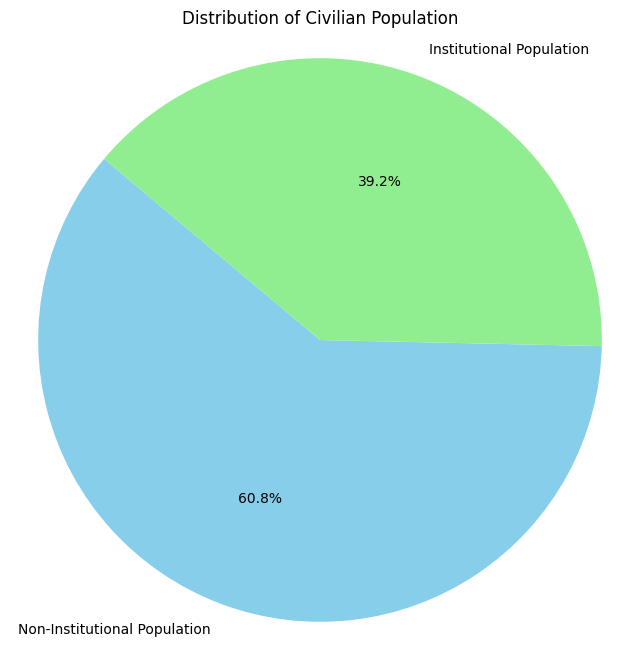

In [ ]:
plt.figure(figsize=(8, 8))
labels = ['Non-Institutional Population', 'Institutional Population']
sizes = [new_df['Total Civilian Non-Institutional Population in State/Area'].sum(), new_df['Total Civilian Labor Force in State/Area'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.axis('equal')
plt.title('Distribution of Civilian Population')
plt.show()

##**UNEMPLOYMENT VS Institutional/Non-Institutional**

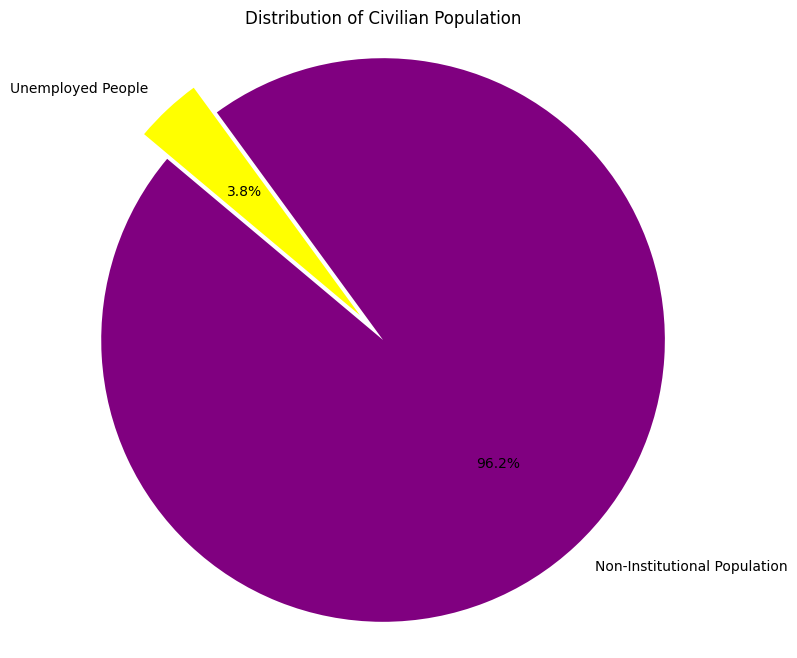

In [ ]:
plt.figure(figsize=(8, 8))
labels = ['Non-Institutional Population', 'Unemployed People']
sizes = [df['Total Civilian Non-Institutional Population in State/Area'].sum(), df['Total Unemployment in State/Area'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['purple', 'yellow'],explode=[0.12,0])
plt.axis('equal')
plt.title('Distribution of Civilian Population')
plt.show()

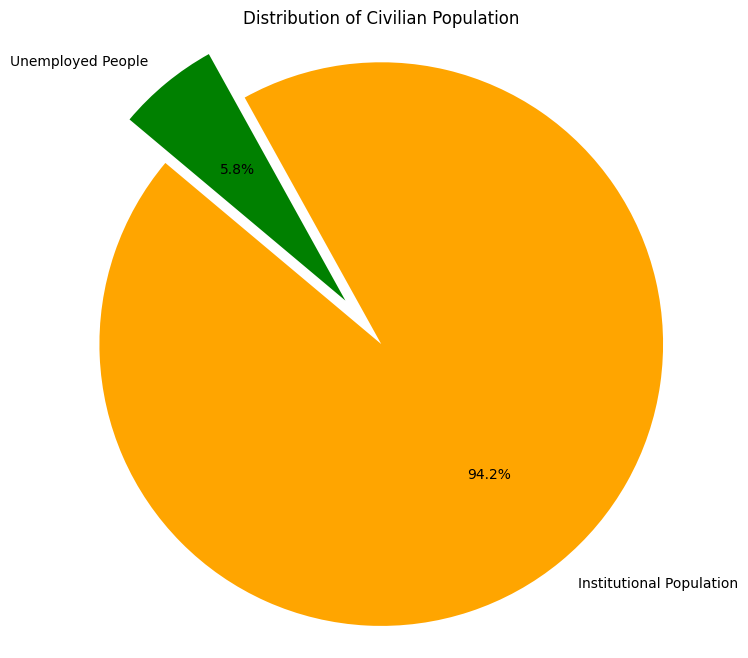

In [ ]:
plt.figure(figsize=(8, 8))
labels = ['Institutional Population', 'Unemployed People']
sizes = [new_df['Total Civilian Labor Force in State/Area'].sum(), new_df['Total Unemployment in State/Area'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'green'],explode=[0.2,0])
plt.axis('equal')
plt.title('Distribution of Civilian Population')
plt.show()

###**POPULATION OF INSTITUTIONAL CIVILIANS IS LESS AND UNEMPLOYMENT AMONG THEM IS MORE IN USA.**